<a href="https://colab.research.google.com/github/rightpeeps/AI_06_Section1_Project1/blob/main/Project2_presentation_0903.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NYC 교통사고 데이터 분석**</br>
2018/01/01 ~ 2021/08/29

**분류 모델의 목적**</br>
NYC Collisions data를 가지고 교통사고가 발생한 상황들 중에 운전자가 다친 상황들을 학습시켜서,</br> 교통사고가 새로 발생하면 인명피해에 대한 지원 유/무를 예측하는 모델을 만들어보겠습니다. </br></br>
예측이 잘 된다면, 교통사고를 빠르게 조치를 하여 사람을 더 빨리 치료할 수 있지 않을까 추측했습니다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('../content/drive/MyDrive/DATA/Motor_Vehicle_Collisions_-_Crashes_filtered3.csv')
df.shape

(188397, 29)

전체 데이터 개수 = 188,397 </br>
전체 특성 개수 = 29개

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188397 entries, 0 to 188396
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     188397 non-null  object 
 1   CRASH TIME                     188397 non-null  object 
 2   BOROUGH                        188397 non-null  object 
 3   ZIP CODE                       188344 non-null  float64
 4   LATITUDE                       188397 non-null  float64
 5   LONGITUDE                      188397 non-null  float64
 6   LOCATION                       188397 non-null  object 
 7   ON STREET NAME                 188397 non-null  object 
 8   CROSS STREET NAME              188286 non-null  object 
 9   OFF STREET NAME                0 non-null       float64
 10  NUMBER OF PERSONS INJURED      188397 non-null  int64  
 11  NUMBER OF PERSONS KILLED       188396 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

결측지가 있는 값들이 많이 보이고, Date time 특성 Crash date, Crash time을 확인했습니다.</br>
BOROUGH : Manhattan, Bronx, Brooklyn, Queens, Richmond

In [ ]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,188344.000000,188397.000000,188397.000000,0.0,188397.000000,188396.000000,188397.000000,188397.000000,188397.000000,188397.000000,188397.000000,188397.000000,1.883970e+05
mean,10881.162575,40.723886,-73.915096,NaN,0.376099,0.001688,0.066413,0.000722,0.041142,0.000175,0.265800,0.000780,4.129726e+06
std,546.860999,0.077605,0.083052,NaN,0.743340,0.042198,0.263321,0.027251,0.201432,0.013234,0.705957,0.029223,1.813489e+05
min,10000.000000,40.500023,-74.253930,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600567e+06
25%,10452.000000,40.671720,-73.971690,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.972207e+06
50%,11208.000000,40.719750,-73.920440,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.127667e+06
75%,11358.000000,40.765823,-73.859840,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.283032e+06
max,11697.000000,40.912468,-73.700584,NaN,22.000000,3.000000,7.000000,2.000000,3.000000,1.000000,21.000000,3.000000,4.452635e+06


describe로 확인 해보니 numbers ~ 특성들의 관계를 확인 할 수 있었습니다.</br>
1. Numbers of persons injured = sum(Number of cyclist,motorist,pedestrians injured)</br>
2. Number of persons killed = sum(Number of cyclist,motorist,pedestrians killed)

In [ ]:
nulldata = df.isna().sum()
print(nulldata[nulldata > 0])

ZIP CODE                             53
CROSS STREET NAME                   111
OFF STREET NAME                  188397
NUMBER OF PERSONS KILLED              1
CONTRIBUTING FACTOR VEHICLE 2     18614
CONTRIBUTING FACTOR VEHICLE 3    175271
CONTRIBUTING FACTOR VEHICLE 4    185240
CONTRIBUTING FACTOR VEHICLE 5    187427
VEHICLE TYPE CODE 1                1167
VEHICLE TYPE CODE 2               31631
VEHICLE TYPE CODE 3              175971
VEHICLE TYPE CODE 4              185366
VEHICLE TYPE CODE 5              187451
dtype: int64


CONTRIBUTING FACTOR VEHICLE 2, VECHILE TYPE CODE 1/2 를 제외한 나머지 데이터는 </br>
결측지가 너무 많아서 대체하기보다 제외하는게 나을 것 같습니다.

#### Profile Report

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

####<font size="3"> Profile Report를 확인 해보니 High Cardinality 특성들이 많았습니다.
1. crash date
1. crash time
1. location
1. on street name
1. cross street name
1. contributing factor vehicle 1
1. contributing factor vehicle 2
1. vehicle type code 1
1. vehicle type code 2
1. vehilce type code 3

결측지와 cardinality를 고려해봤을때, 이 특성들은 전처리가 필요하다고 판단하였습니다.
1. contributing factor vehicle 1
1. contributing factor vehicle 2
1. vehicle type code 1
1. vehicle type code 2
</font>

#### pip installs

In [ ]:
pip install -U pandas-profiling

     |████████████████████████████████| 10.3 MB 7.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install category_encoders

In [ ]:
pip install pdpbox

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.0.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install shap

In [ ]:
pip install eli5

### EDA & 전처리

#### 1. Columns 수정 - lower case, remove space, edit names

In [ ]:
df.columns = df.columns.str.lower() #lower case로 변경
df.columns = df.columns.str.replace(' ','_') 

df.rename(columns={
    'on_street_name': 'street_name',
    'contributing_factor_vehicle_1' : 'causes1',
    'contributing_factor_vehicle_2' : 'causes2',
    'contributing_factor_vehicle_3' : 'causes3',
    'contributing_factor_vehicle_4' : 'causes4',
    'contributing_factor_vehicle_5' : 'causes5',
    'vehicle_type_code_1' : 'vehicle_type1',
    'vehicle_type_code_2' : 'vehicle_type2',
    'vehicle_type_code_3' : 'vehicle_type3',
    'vehicle_type_code_4' : 'vehicle_type4',
    'vehicle_type_code_5' : 'vehicle_type5'
},
          inplace=True)

In [ ]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'causes1', 'causes2', 'causes3', 'causes4',
       'causes5', 'collision_id', 'vehicle_type1', 'vehicle_type2',
       'vehicle_type3', 'vehicle_type4', 'vehicle_type5'],
      dtype='object')

사용할 특성들의 columns 이름을 우선 사용하기 편하게 변경하였습니다.</br>
lowercase, space대체, 이름변경

#### 2. 타겟값 처리

In [ ]:
def target_engineer(df):
    
    # 새로운 타겟 injured = Number of motorist injured, killed에 값이 있을 경우 = 1 / 아닐 경우 0
    injured = df.iloc[:,16:18].sum(axis=1)
    df['injured'] = (injured > 0).apply(int)

    # 새 타겟으로 인해 data leakage 있을만한 연관 특성 제거 injured, killed 값을 보여주는 columns 제거
    cols = [col for col in df if col.startswith('number_of')]
    df = df.drop(columns = cols,axis=1,inplace=True)
    return df

target_engineer(df)

In [ ]:
target = 'injured'

교통사고가 발생했을 시, 운전자가 부상을 입었을것이다/아니다를  예측하는 모델이기 때문에,</br>
numbers of motorist injured / killed 를 합친 값이 0보다 크다면 (1이 라면) </br>
교통사고에서 부상을 당했을 것이다 라고 타겟을 설정하였습니다.

In [ ]:
df.injured.value_counts() # 타겟 클래스비율 0 = 인명사고x / 1 = 인명사고 o

0    155497
1     32900
Name: injured, dtype: int64

In [ ]:
155497/ 188397

0.8253687691417592

타겟 클래스 비율을 보니 발생한 사고의 83%는 부상이 없었고 / 17%는 부상이 있었습니다.

####3. 결측치 처리

In [ ]:
def na_engineer(df):
    # Contributing Factor vehicle 2의 Nan값, 'nan' value 처리
    df.causes2 = df.causes2.fillna('Unspecified') # NaN값 'Unspecified' 변경
    df.causes2 = df.causes2.replace(['nan'], ['Unspecified'])# 'nan'값 'Unspecified' 변경

    cols = ['zip_code', 'location','cross_street_name','off_street_name','causes3',
                       'causes4','causes5','vehicle_type3','vehicle_type4',
                       'vehicle_type5']
    df = df.drop(columns = cols ,axis=1,inplace=True)
    return df

na_engineer(df)

In [ ]:
df.shape

(188397, 12)

CONTRIBUTING FACTOR VEHICLE 2 > cause2 로 변경 </br>
cause2의 nan값 18614개를 NaN값과 'nan'값을 Unspecified로 변경 하였습니다.</br>
</br>

zip_code, location = Borough, streetname으로 학습 가능한 데이터 (leakage risk)</br>
cross_street_name, off_street_name = 다수의 결측치</br>
cause3, cause4, cause5 = 다수의 결측치</br>
vehicle_type3, vehicle_type4, vehicle_type5 = 다수의 결측치</br>

#### 4. CRASH DATE / CRASH TIME 특성 DATE TIME 설정 및 전처리

In [ ]:
def time_engineer(df):
    # crash date
    df.crash_date = pd.to_datetime(df.crash_date)

    # crash time
    daynight = pd.to_datetime(df.crash_time) # daynight이라는 datetime 포맷 데이터 생성
    df['crash_time2'] = daynight
    df.crash_time2.loc[(daynight.dt.hour >= 5) & (daynight.dt.hour < 12)] = 'morning'  
    df.crash_time2.loc[(daynight.dt.hour >= 12) & (daynight.dt.hour < 19)] = 'afternoon'
    df.crash_time2.loc[(daynight.dt.hour >= 19) & (daynight.dt.hour < 24)] = 'evening'  
    df.crash_time2.loc[(daynight.dt.hour >= 0) & (daynight.dt.hour < 5)] = 'midnight' 

    # 새 타겟으로 인해 data leakage 있을만한 연관 특성 제거 injured, killed 값을 보여주는 columns 제거
    df = df.drop(columns = 'crash_time',axis=1,inplace=True)
    return df

time_engineer(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
df.crash_time2.value_counts()

afternoon    85906
morning      49800
evening      36287
midnight     16404
Name: crash_time2, dtype: int64

crash date, crash time을 datetime형식을 바꾼 뒤, crash time의 시간대를 </br>
morning, afternoon, evening, midnight으로 나누어서 상황별 학습에 도움을 주기 위해</br> 햇빛의 양을 4단계로 나누었습니다.


#### 5. vehicle type1 - Cardinality 축소

In [ ]:
df.vehicle_type1.nunique() #428개 확인 188397개의 데이터가 428개로 categorized

428

In [ ]:
vehicle_types1 = df.vehicle_type1.value_counts(normalize=True)[:20].index.tolist() # top20 리스트로 저장

In [ ]:
len(df[df.vehicle_type1.isin(vehicle_types1)]) 

184725

In [ ]:
len(df[~df.vehicle_type1.isin(vehicle_types1)])

3672

In [ ]:
df = df.loc[df.vehicle_type1.isin(vehicle_types1)]

vehicle type1 특성은 top20 카테고리들이 188397 중에 184725 (98%) </br>
나머지 408개의 카테고리들은 3672 (2%), 3672개의 데이터는 양도 작고 체울 수 없다고 판단하여 drop </br>
데이터 축소: 188397 (- 3672) -> 184725</br>
 </br>
**Top20** </br>
['Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Taxi',
 'Pick-up Truck',
 'Box Truck',
 'Bus',
 'Bike',
 'Van',
 'Tractor Truck Diesel',
 'Motorcycle',
 'Dump',
 'Ambulance',
 'Convertible',
 'E-Bike',
 'Flat Bed',
 'Garbage or Refuse',
 'PK',
 'E-Scooter',
 'Carry All',
 'Moped']

#### 6. vehicle type2 - Cardinality 축소

In [ ]:
df.vehicle_type2.nunique()  #457개 확인 184725개의 데이터가 428개로 categorized

457

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184725 entries, 0 to 188396
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   crash_date     184725 non-null  datetime64[ns]
 1   borough        184725 non-null  object        
 2   latitude       184725 non-null  float64       
 3   longitude      184725 non-null  float64       
 4   street_name    184725 non-null  object        
 5   causes1        184725 non-null  object        
 6   causes2        184725 non-null  object        
 7   collision_id   184725 non-null  int64         
 8   vehicle_type1  184725 non-null  object        
 9   vehicle_type2  154680 non-null  object        
 10  injured        184725 non-null  int64         
 11  crash_time2    184725 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 18.3+ MB


vehicle type2는 184725 전체 중 154680 = non-null / 30045 = null입니다.

In [ ]:
32673/184725

0.17687373122208688

In [ ]:
vehicle_types2 = df.vehicle_type2.value_counts(normalize=True)[:20].index.tolist() # top20 리스트로 저장

In [ ]:
len(df.query(f'vehicle_type2 == {vehicle_types2}')) # 184725 전체 중 152052 = top 20 / 32673 = null & not top 20

152052

In [ ]:
len(df.query(f'vehicle_type2 != {vehicle_types2}')) # 32673 = 이 중, 30045 개는 null / 2628는 top20 이외의 값

32673

In [ ]:
df['vehicle_type2_new'] = '' 
df.vehicle_type2_new = df.vehicle_type2.loc[df.vehicle_type2.isin(vehicle_types2)] #상위 20개
df.vehicle_type2_new = df.vehicle_type2_new.fillna('Unspecified')
df.drop(columns = 'vehicle_type2', axis=1,inplace=True)

In [ ]:
df.vehicle_type2_new.value_counts(dropna=False)

Sedan                                  66256
Station Wagon/Sport Utility Vehicle    52969
Unspecified                            32673
Taxi                                    7230
Bike                                    5999
Pick-up Truck                           5002
Box Truck                               4396
Bus                                     2887
Tractor Truck Diesel                    1171
Van                                     1117
Motorcycle                              1046
E-Bike                                   753
Dump                                     581
E-Scooter                                522
Convertible                              377
Flat Bed                                 371
Ambulance                                319
Garbage or Refuse                        312
PK                                       277
Moped                                    242
Carry All                                225
Name: vehicle_type2_new, dtype: int64

vehicle type2 특성은 top20 카테고리들이 184725 중에 152052 (82%)</br>
나머지 437개의 카테고리들은 32673 (18%), 이중 30045개는 null, 2628개는 not top20다. </br> 30045개의 데이터를 체울 방법이 없기 때문에, 'Unspecified'로 값을 대체하였습니다.</br>


Data leakage를 방지 하기 위해, 특성 공학을 진행한 vehicle_type2를 drop하였습니다.

#### 7. days 특성 추가 

In [ ]:
df.crash_date

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
188392   2021-08-29
188393   2021-08-29
188394   2021-08-29
188395   2021-08-29
188396   2021-08-29
Name: crash_date, Length: 184725, dtype: datetime64[ns]

In [ ]:
df['days'] = df.crash_date.dt.weekday 
df['days'].value_counts()

4    29522
3    28127
1    27441
2    27170
0    26360
5    24696
6    21409
Name: days, dtype: int64

#### 8. street name -  Cardinality 축소

In [ ]:
df.street_name.nunique() # 6733개로, 너무 많은걸 볼 수 있다

6733

In [ ]:
street_names_df = df.street_name.value_counts().to_frame()
mask = street_names_df.street_name > 2 # 2개의 빈도수가 넘는 street_name
street_names1 = street_names_df.loc[mask].index.tolist()
len(street_names1)

4294

In [ ]:
len(df.query(f'street_name == {street_names1}')) 

181489

In [ ]:
len(df.query(f'street_name != {street_names1}'))

3236

2개이상의 빈도수가아닌 street name이 4294 개다 = 우연이 아닌 사고들이라고 기준을 잡았습니다. </br>
184725 전체 중 181489 개는 2번의 사고 이상이 있었던 도로이며,</br>
3236 = 'others' 사고가 1번이었던 도로들의 집합입니다.

In [ ]:
df['street_name_new'] = '' 
df.street_name_new = df.street_name.loc[df.street_name.isin(street_names1)] # 사고가 2번이상 난 street_name
df.street_name_new = df.street_name_new.fillna('others') # NaN 'others 처리

In [ ]:
df.street_name_new.value_counts(dropna=False)

others                              3236
ATLANTIC AVENUE                     2108
BROADWAY                            2107
3 AVENUE                            2007
NORTHERN BOULEVARD                  1791
                                    ... 
EAST 67 STREET                         3
EAST 21 STREET                         3
BURNETT STREET                         3
DUDLEY AVENUE                          3
WEST 22 STREET                         3
Name: street_name_new, Length: 4295, dtype: int64

In [ ]:
lat_long = df[['latitude','longitude']] # borough,street_name 이면 대체 될 데이터 나중 위해 저장
collision_id = df[['collision_id']]   # collision id 나중에 데이터 추가 연결할때 id로 쓰기 위해 저장

In [ ]:
cols = ['longitude','latitude','collision_id','street_name']
df.drop(columns = cols, axis=1,inplace=True)

### 사고 날짜(시계열) 기준 훈련/검증/테스트 나누기 

In [ ]:
df = df.set_index('crash_date') 

In [ ]:
184725 *0.2

36945.0

In [ ]:
train = df.loc[df.index < '2019-08-10',:] # 과거
val = df.loc[(df.index >= '2019-08-10') & (df.index < '2020-05-10')] #중간
test = df.loc[df.index >= '2020-05-10',:] # 최근 test = (36945가 20프로) 

train.shape, val.shape, test.shape #70959 rows 맞게 분할 확인

((110250, 9), (37201, 9), (37274, 9))

In [ ]:
target = 'injured'
features = df.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, 

((110250, 8), (110250,), (37201, 8), (37201,), (37274, 8), (37274,))

### Baseline Model

In [ ]:
y_train

crash_date
2018-01-01    1
2018-01-01    0
2018-01-01    0
2018-01-01    0
2018-01-01    0
             ..
2019-08-09    0
2019-08-09    0
2019-08-09    0
2019-08-09    0
2019-08-09    0
Name: injured, Length: 110250, dtype: int64

In [ ]:
y_train.value_counts(normalize=True) # 타겟 비율 확인

0    0.848535
1    0.151465
Name: injured, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
import statistics

# 베이스라인 모델의 타겟 클래스 확인
pred = statistics.mode(y_train)
y_pred_base = [pred] * len(y_test)
score = accuracy_score(y_test, y_pred_base)

print(f'Baseline model accuracy score: {score}')  # 74퍼센트의 확률로 0을 맞춤 (모두 0으로 예측한 경우)

Baseline model accuracy score: 0.7413746847668616


In [271]:
# 기본 분류 모델
dt_pipe = Pipeline([
  ('preprocessing', make_pipeline(OrdinalEncoder())),
  ('dt', DecisionTreeClassifier(random_state=2))
])
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_val)

print(classification_report(y_val, y_pred))
print('검증 세트 accuracy: ', dt_pipe.score(X_val, y_val))
print('검증 세트 recall: ',recall_score(y_val, y_pred))
print('검증 세트 f1: ',f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     31123
           1       0.24      0.23      0.23      6078

    accuracy                           0.75     37201
   macro avg       0.54      0.54      0.54     37201
weighted avg       0.75      0.75      0.75     37201

검증 세트 accuracy:  0.7523184860622026
검증 세트 recall:  0.23165514972030274
검증 세트 f1:  0.2340814630091438


**베이스라인 모델은 0/1을 예측하는 분류 모델입니다.**</br>
0 = 사고가 났는데 운전자가 다치지 않았을 것이다.</br>
1 = 사고가 났는데 운전자가 다쳤을 것이다.</br></br>

**평가지표 accuracy, recall, f1 score**</br>
실제 1을 1이라고 맞게 예측한 비율이 높아야 모델을 평가할 수 있습니다. </br>
현재 타겟클래스가 불균형 하기 때문에, precision으로 평가는 좋지 않을 것입니다. </br>
precision, recall, f1값을 확인할 수 있는 classification_report / Confusion Matrix로 모델을 평가하겠습니다. </br></br>

**DecisionTreeClassifier - 베이스라인 분류 모델**</br>
Accuracy:  75%</br>
recall:    23%</br>
f1_score:  23%</br></br>
f1값을 확인하면 예측을 많이 틀리는걸 확인 할 수 있다.

### 학습 모델 선택

#### pip installs ML

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install catboost

#### Random Forest 모델

##### 기본 weight 조정 모델

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
rf_pipe = Pipeline([
  ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
  ('rf', RandomForestClassifier(class_weight='balanced', max_depth=5))
])

In [ ]:
# 기본 랜덤포레스트 모델 최소 설정
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_val)

Text(0.5, 1.0, 'Confusion matrix, n = 37201')

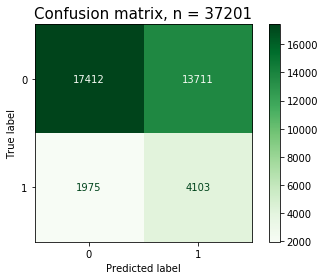

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf_pipe, X_val, y_val,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
print(classification_report(y_val, y_pred))
print('검증 세트 accuracy: ', rf_pipe.score(X_val, y_val))
print('검증 세트 recall: ',recall_score(y_val, y_pred))
print('검증 세트 f1: ',f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69     31123
           1       0.23      0.68      0.34      6078

    accuracy                           0.58     37201
   macro avg       0.56      0.62      0.52     37201
weighted avg       0.79      0.58      0.63     37201

검증 세트 accuracy:  0.5783446681540819
검증 세트 recall:  0.6750575847318196
검증 세트 f1:  0.34346224677716386


랜덤포레스트 모델에 class weight = balanced와 depth를 조정한 결과입니다.</br></br>
**random forest - weight 조절**</br>
Accuracy:  58%</br>
recall:    68%</br>
f1_score:  34%</br>

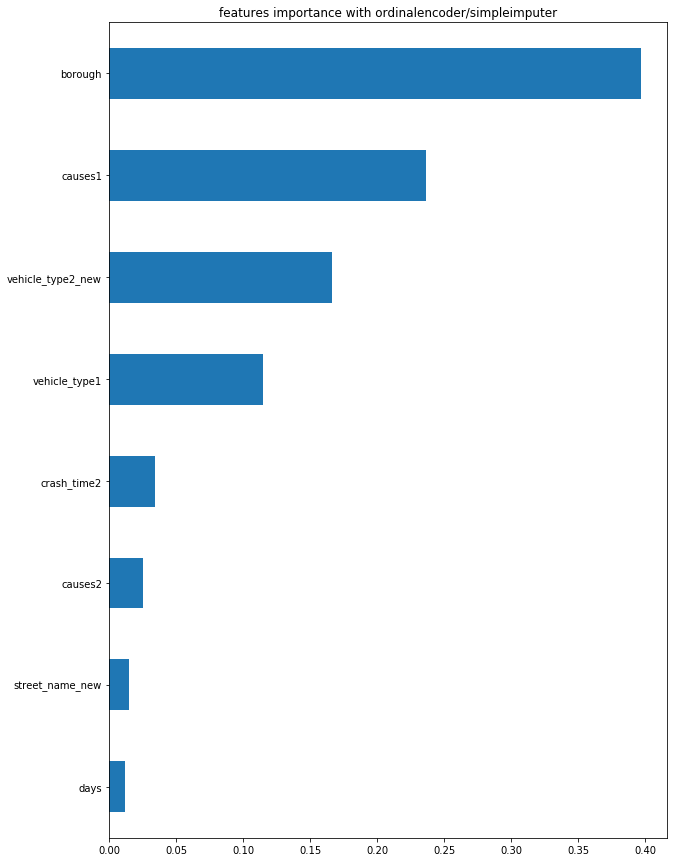

In [ ]:
# ordinal encoding 후, 모델의 feature importance 확인

importances = pd.Series(rf_pipe.named_steps['rf'].feature_importances_, X_train.columns)

plt.figure(figsize=(10,15))
plt.title(f'features importance with ordinalencoder/simpleimputer')
importances.sort_values().plot.barh();

feature importance를 확인 해봤습니다. </br>
borough, causes1, vehicle_type2_new, vehicle_type원이 1을 예측하는데 연관이 있어보입니다 </br>

##### gridsearhCV 조정 모델

In [ ]:
encoder = rf_pipe.named_steps['preprocessing'] # OrdinalEncoder(), SimpleImputer() 
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [ ]:
%%time
rf_model = GridSearchCV(estimator= RandomForestClassifier(random_state=2),
                   param_grid=[{'max_depth': [5,8,10],
                                'min_samples_split':[2,3,5,7],
                                'n_estimators':[10,50,100],
                                'class_weight':['balanced']
                                }],
                   scoring='accuracy', 
                   cv=3) 

rf_model.fit(X_train_encoded, y_train)
print('best parameters : ', rf_model.best_params_)
print('best accuracy score : ', rf_model.best_score_)
em = rf_model.best_estimator_
rf_pred = rf_model.predict(X_val_encoded)

best parameters :  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
best accuracy score :  0.6115102040816326
CPU times: user 3min 33s, sys: 2.18 s, total: 3min 35s
Wall time: 3min 34s


GridSearchCV를 사용하여, 최적의 파라미터를 구해서 적용했습니다.

In [ ]:
rf_pred = rf_model.predict(X_val_encoded)

Text(0.5, 1.0, 'Confusion matrix, n = 37201')

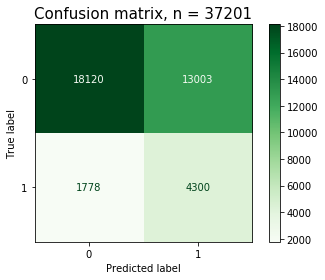

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf_model, X_val_encoded, y_val,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
print(classification_report(y_val, rf_pred))
print('검증 세트 accuracy: ', rf_model.score(X_val_encoded, y_val))
print('검증 세트 recall: ',recall_score(y_val, rf_pred))
print('검증 세트 f1: ',f1_score(y_val, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71     31123
           1       0.25      0.71      0.37      6078

    accuracy                           0.60     37201
   macro avg       0.58      0.64      0.54     37201
weighted avg       0.80      0.60      0.65     37201

검증 세트 accuracy:  0.6026719711835703
검증 세트 recall:  0.7074695623560382
검증 세트 f1:  0.3678200248064668


랜덤포레스트 모델에 gridsearchCV를 사용하여 파라미터를 조정한 결과입니다.</br></br>

**random forest - weight 조절**</br>
Accuracy:  58%</br>
recall:    68%</br>
f1_score:  34%</br></br>

**random forest - gridsearchCV 파라미터 조절**</br>
Accuracy:  60%</br>
recall:    71%</br>
f1_score:  37%</br>

#### Catboost 모델

In [ ]:
import catboost as cb
from catboost import CatBoostClassifier
from matplotlib import pyplot as plt

In [ ]:
y_train.value_counts(normalize=True)

0    0.848535
1    0.151465
Name: injured, dtype: float64

In [ ]:
0.849087/0.150913 # weight 5.6배 확인

5.626334378085388

In [ ]:
import time
start = time.time()
cb_dtrain = cb.Pool(data = X_train_encoded, label = y_train)
cb_model = CatBoostClassifier (max_depth= 10,
            learning_rate = 0.02,
            iterations = 200,
            eval_metric = 'Accuracy',
            class_weights = [1, 5.6],
            task_type = 'GPU'
)

cb_model.fit(X_train_encoded,y_train)

0:	learn: 0.5978070	total: 22.7ms	remaining: 4.52s
1:	learn: 0.6224828	total: 44.8ms	remaining: 4.44s
2:	learn: 0.6346561	total: 66.9ms	remaining: 4.39s
3:	learn: 0.6342167	total: 89.1ms	remaining: 4.36s
4:	learn: 0.6319683	total: 111ms	remaining: 4.31s
5:	learn: 0.6319330	total: 131ms	remaining: 4.25s
6:	learn: 0.6331272	total: 152ms	remaining: 4.19s
7:	learn: 0.6320549	total: 172ms	remaining: 4.13s
8:	learn: 0.6320902	total: 193ms	remaining: 4.09s
9:	learn: 0.6330064	total: 213ms	remaining: 4.05s
10:	learn: 0.6397987	total: 233ms	remaining: 4.01s
11:	learn: 0.6426041	total: 254ms	remaining: 3.98s
12:	learn: 0.6515817	total: 274ms	remaining: 3.94s
13:	learn: 0.6525418	total: 294ms	remaining: 3.91s
14:	learn: 0.6434862	total: 315ms	remaining: 3.88s
15:	learn: 0.6439170	total: 335ms	remaining: 3.85s
16:	learn: 0.6433173	total: 355ms	remaining: 3.82s
17:	learn: 0.6432798	total: 375ms	remaining: 3.79s
18:	learn: 0.6522521	total: 395ms	remaining: 3.77s
19:	learn: 0.6534089	total: 416ms	rem

In [ ]:
cb_pred = cb_model.predict(X_val_encoded)

Text(0.5, 1.0, 'Confusion matrix, n = 37201')

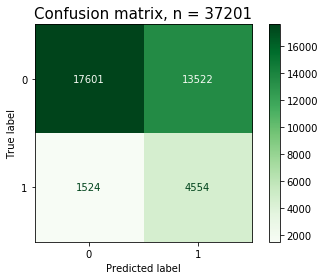

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(cb_model, X_val_encoded, y_val,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
print(classification_report(y_val, cb_pred))
print('검증 세트 accuracy: ', cb_model.score(X_val_encoded, y_val))
print('검증 세트 recall: ',recall_score(y_val, cb_pred))
print('검증 세트 f1: ',f1_score(y_val, cb_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70     31123
           1       0.25      0.75      0.38      6078

    accuracy                           0.60     37201
   macro avg       0.59      0.66      0.54     37201
weighted avg       0.81      0.60      0.65     37201

검증 세트 accuracy:  0.5955485067605709
검증 세트 recall:  0.7492596248766041
검증 세트 f1:  0.37708040076177857


Catboost 모델에 weight를 조정한 결과입니다.</br></br>

**random forest - weight 조절**</br>
Accuracy:  58%</br>
recall:    68%</br>
f1_score:  34%</br></br>

**random forest - gridsearchCV 파라미터 조절**</br>
Accuracy:  60%</br>
recall:    71%</br>
f1_score:  37%</br></br>

**Catboost - 파라미터 설정 weight 조절**</br>
Accuracy:  60%</br>
recall:    75%</br>
f1_score:  38%</br>

#### Xgboost 모델

In [ ]:
ratio = 0.849087 / 0.150913
ratio

5.626334378085388

In [ ]:
from xgboost import XGBClassifier

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
xg_model = XGBClassifier(n_estimators=300, n_jobs=-1, scale_pos_weight=ratio)
xg_model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='auc', early_stopping_rounds=10)

[0]	validation_0-auc:0.618552	validation_1-auc:0.611136
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.626912	validation_1-auc:0.618516
[2]	validation_0-auc:0.63062	validation_1-auc:0.620451
[3]	validation_0-auc:0.636959	validation_1-auc:0.627678
[4]	validation_0-auc:0.637789	validation_1-auc:0.628357
[5]	validation_0-auc:0.643185	validation_1-auc:0.633738
[6]	validation_0-auc:0.648929	validation_1-auc:0.638027
[7]	validation_0-auc:0.667516	validation_1-auc:0.654879
[8]	validation_0-auc:0.666891	validation_1-auc:0.654286
[9]	validation_0-auc:0.66702	validation_1-auc:0.654344
[10]	validation_0-auc:0.67785	validation_1-auc:0.66738
[11]	validation_0-auc:0.679693	validation_1-auc:0.668671
[12]	validation_0-auc:0.679858	validation_1-auc:0.668589
[13]	validation_0-auc:0.680078	validation_1-auc:0.668959
[14]	validation_0-auc:0.681198	validation_1-auc:0.669667
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.626334378085388,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xg_pred = xg_model.predict(X_test_encoded)

Text(0.5, 1.0, 'Confusion matrix, n = 37274')

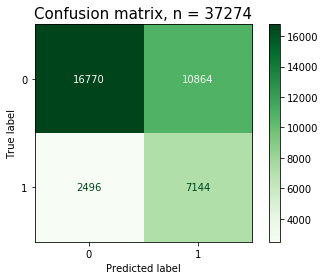

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(xg_model, X_test_encoded, y_test,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

In [ ]:
print(classification_report(y_test, xg_pred))
print('테스트 세트 accuracy: ', xg_model.score(X_test_encoded, y_test))
print('테스트 세트 recall: ',recall_score(y_test, xg_pred))
print('테스트 세트 f1: ',f1_score(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     27634
           1       0.40      0.74      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.62     37274
weighted avg       0.75      0.64      0.66     37274

테스트 세트 accuracy:  0.641573214573161
테스트 세트 recall:  0.7410788381742739
테스트 세트 f1:  0.5167824074074074


In [273]:
# Catboost/ xgboost 비교위해 test로 검증
cb_pred = cb_model.predict(X_test_encoded)
print(classification_report(y_test, cb_pred))
print('테스트 세트 accuracy: ', cb_model.score(X_test_encoded, y_test))
print('테스트 세트 recall: ',recall_score(y_test, cb_pred))
print('테스트 세트 f1: ',f1_score(y_test, cb_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     27634
           1       0.40      0.75      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.61     37274
weighted avg       0.75      0.64      0.66     37274

테스트 세트 accuracy:  0.6388635510006976
테스트 세트 recall:  0.7481327800829876
테스트 세트 f1:  0.5172673480365788


xgboost모델에 파라미터를 조정한 결과입니다.</br></br>

**Val 데이터로 검증**</br>

1. **random forest - weight 조절**</br>
Accuracy:  58%</br>
recall:    68%</br>
f1_score:  34%</br></br>

1. **random forest - gridsearchCV 파라미터 조절**</br>
Accuracy:  60%</br>
recall:    71%</br>
f1_score:  37%</br></br>

1. **Catboost - 파라미터 설정 weight 조절**</br>
Accuracy:  60%</br>
recall:    75%</br>
f1_score:  38%</br>

**test 데이터로 검증**</br>

1. **xgboost - 파라미터 설정 weight 조절**</br>
Accuracy:  64.2%</br>
recall:    74.1%</br>
f1_score:  51.7%</br></br>

1. **Catboost - 파라미터 설정 weight 조절**</br>
Accuracy:  63.9%</br>
recall:    74.9%</br>
f1_score:  51.8%</br>


### 최종모델: Catboost 모델 - PDP Plots / Shap Force Plots

##### 최종모델 overview

In [272]:
# Catboost 최종모델 평가
cb_pred = cb_model.predict(X_test_encoded)
print(classification_report(y_test, cb_pred))
print('테스트 세트 accuracy: ', cb_model.score(X_test_encoded, y_test))
print('테스트 세트 recall: ',recall_score(y_test, cb_pred))
print('테스트 세트 f1: ',f1_score(y_test, cb_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     27634
           1       0.40      0.75      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.61     37274
weighted avg       0.75      0.64      0.66     37274

테스트 세트 accuracy:  0.6388635510006976
테스트 세트 recall:  0.7481327800829876
테스트 세트 f1:  0.5172673480365788


In [ ]:
# 베이스라인 분류 모델
rf_pipe = Pipeline([
  ('preprocessing', make_pipeline(OrdinalEncoder())),
  ('dt', DecisionTreeClassifier(random_state=2))
])
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_val)

print(classification_report(y_val, y_pred))
print('검증 세트 accuracy: ', rf_pipe.score(X_val, y_val))
print('검증 세트 recall: ',recall_score(y_val, y_pred))
print('검증 세트 f1: ',f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     31123
           1       0.24      0.23      0.23      6078

    accuracy                           0.75     37201
   macro avg       0.54      0.54      0.54     37201
weighted avg       0.75      0.75      0.75     37201

검증 세트 accuracy:  0.7523184860622026
검증 세트 recall:  0.23165514972030274
검증 세트 f1:  0.2340814630091438


**Catboost - 최종모델 (파라미터 설정 weight 조절)**</br>
Accuracy: 63.9%</br>
recall: 74.9%</br>
f1_score: 51.8%</br></br>

**DecisionTreeClassifier - 베이스라인 분류 모델**</br>
Accuracy:  75%</br>
recall:    23%</br>
f1_score:  23%</br>

비교해보면 기본 분류 모델에 비해 정확도는 떨어지지만 f1값이 2배가까이 늘어난걸 볼 수 있다.</br>
불균형한 클래스를 weight와 파라미터 조절로 수정하여 더 좋은 f1값이 나왔다.

##### pip installs - pdp shap

In [ ]:
pip install delayed

In [ ]:
pip install pdpbox

##### PDP Plots

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib

matplotlib.font_manager._rebuild() # Arial Font 불러오기 에러

In [ ]:
X_train_encoded_pd = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded_pd = pd.DataFrame(X_test_encoded, columns=X_test.columns)
X_val_encoded_pd = pd.DataFrame(X_val_encoded, columns=X_val.columns)

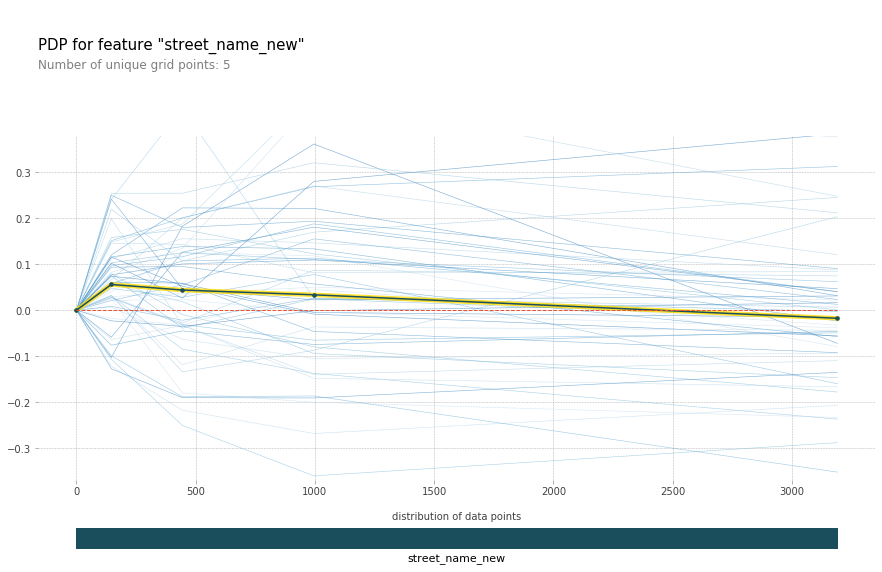

In [ ]:
feature = 'street_name_new'

isolated = pdp_isolate(
    model= cb_model, 
    dataset= X_train_encoded_pd, 
    model_features= X_train.columns, 
    feature= feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=5 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. **'street_name_new' = 타겟과 비교적 음적인 관계입니다 (양적 > 음적 변화)</br>**

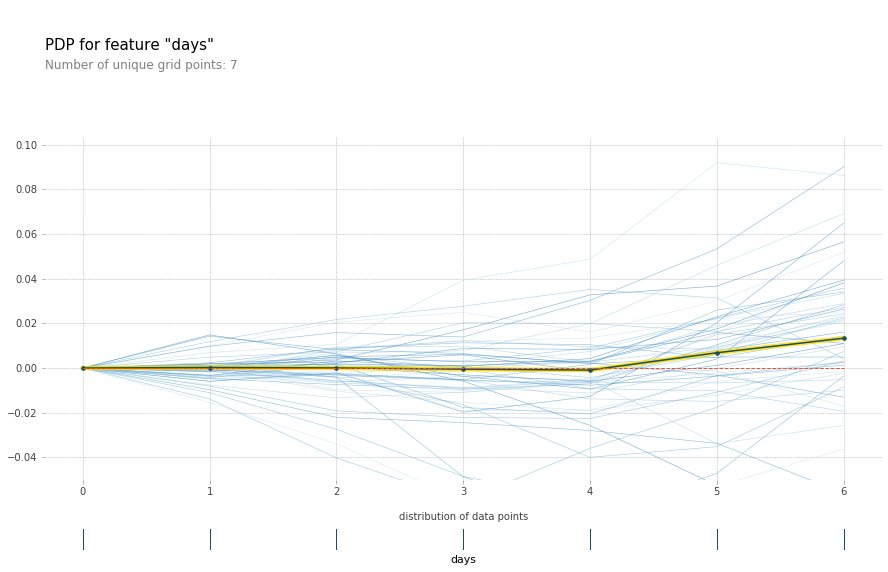

In [ ]:
feature = 'days'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. **'days' = 타겟과 비교적 양적인 관계입니다</br>**

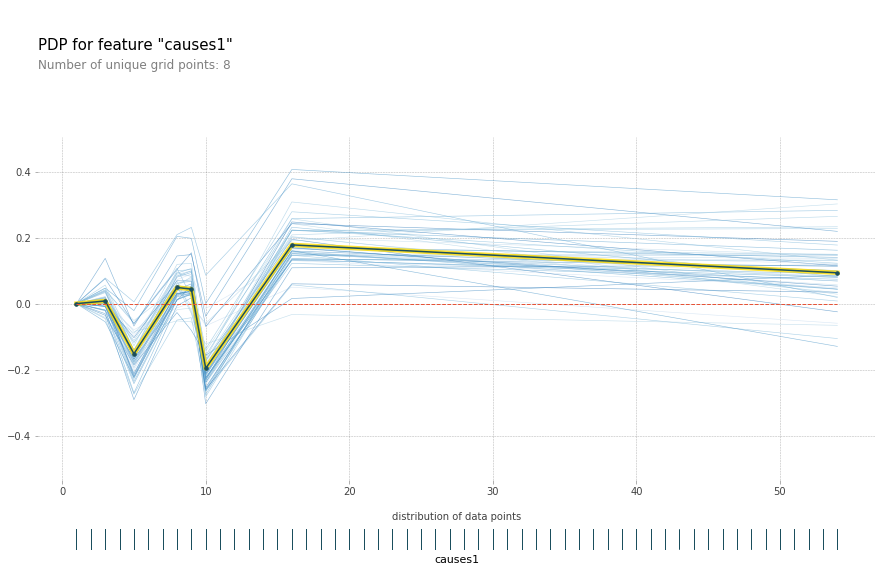

In [ ]:
feature = 'causes1'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. **'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>**

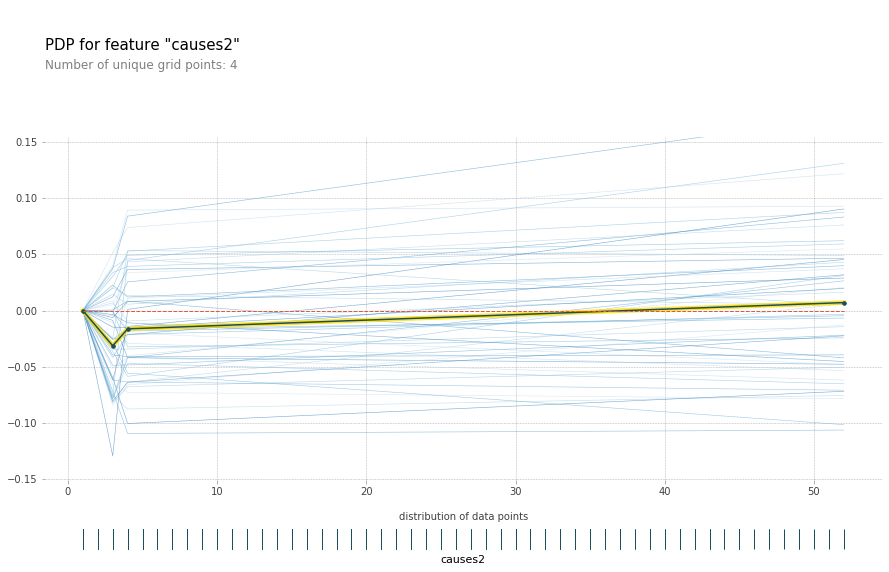

In [ ]:
feature = 'causes2'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. 'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>
1. **'causes2' = 타겟과 비교적 양적인 관계입니다 (음적 > 양적 변화)</br>**

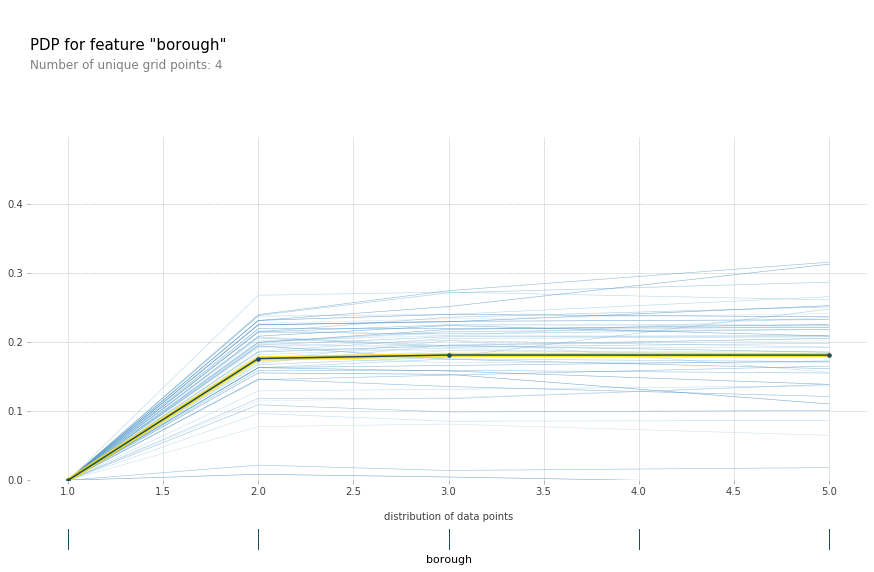

In [ ]:
feature = 'borough'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. 'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>
1. 'causes2' = 타겟과 비교적 양적인 관계입니다 (음적 > 양적 변화)</br>
1. **'borough' = 타겟과 비교적 양적인 관계입니다 (서서히 균일해짐)</br>**

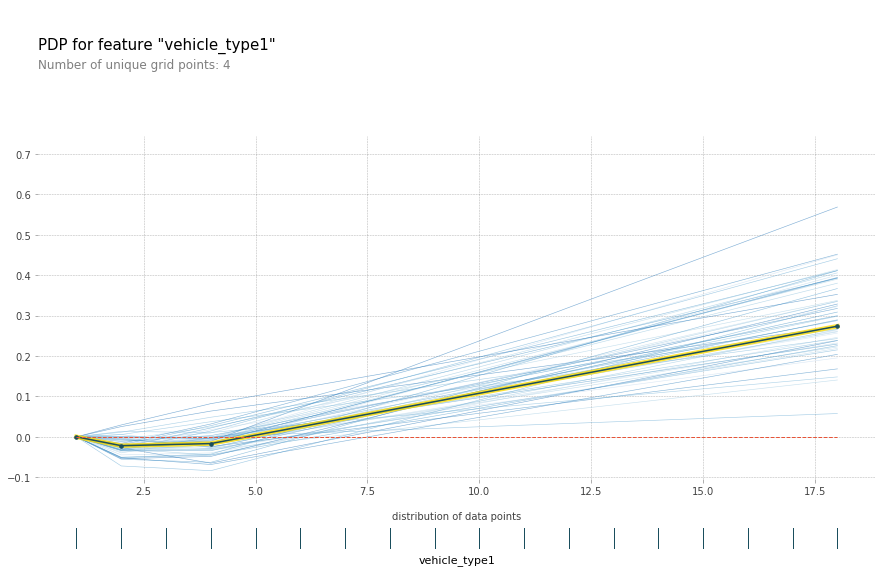

In [ ]:
feature = 'vehicle_type1'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. 'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>
1. 'causes2' = 타겟과 비교적 양적인 관계입니다 (음적 > 양적 변화)</br>
1. 'borough' = 타겟과 비교적 양적인 관계입니다 (서서히 균일해짐)</br>
1. **'vehicle_type1' = 타겟과 양적인 관계입니다</br>**

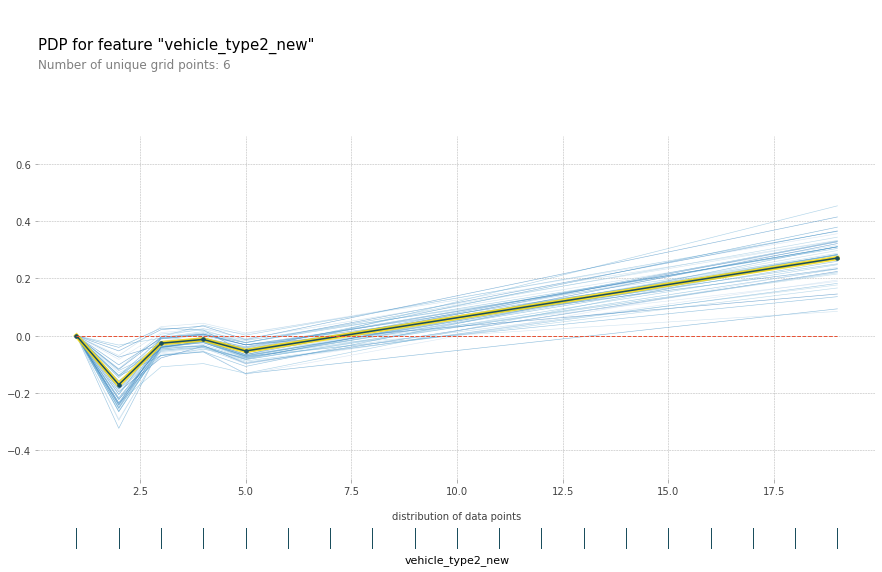

In [ ]:
feature = 'vehicle_type2_new'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. 'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>
1. 'causes2' = 타겟과 비교적 양적인 관계입니다 (음적 > 양적 변화)</br>
1. 'borough' = 타겟과 비교적 양적인 관계입니다 (서서히 균일해짐)</br>
1. 'vehicle_type1' = 타겟과 양적인 관계입니다</br>
1.**'vehicle_type2_new' = 타겟과 양적인 관계입니다 (음적 > 양적 변화)</br>**

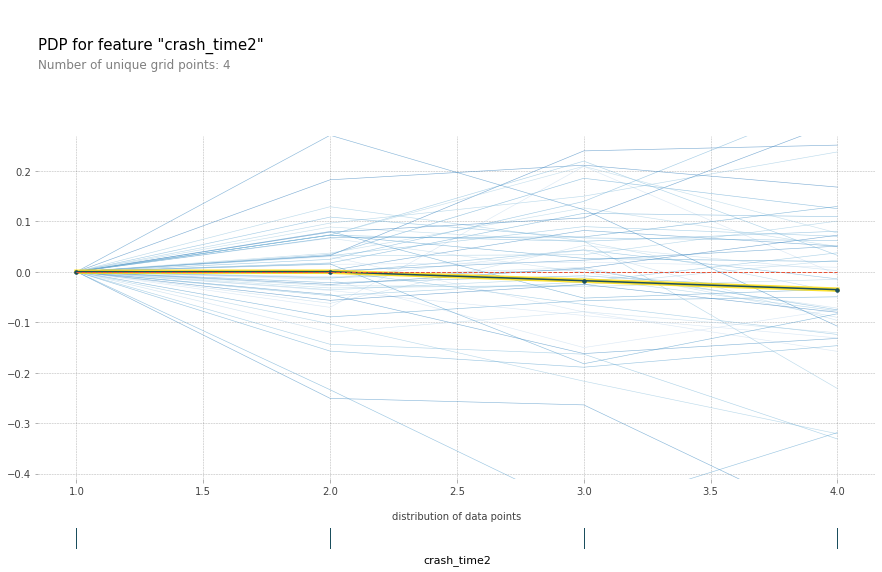

In [ ]:
feature = 'crash_time2'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

1. 'street_name_new' = 타겟과 음적/양적인 관계입니다 (양적 > 음적 변화)</br>
1. 'days' = 타겟과 비교적 양적인 관계입니다</br>
1. 'causes1' = 타겟과 음적/양적인 관계입니다 (서서히 균일해짐)</br>
1. 'causes2' = 타겟과 비교적 양적인 관계입니다 (음적 > 양적 변화)</br>
1. 'borough' = 타겟과 비교적 양적인 관계입니다 (서서히 균일해짐)</br>
1. 'vehicle_type1' = 타겟과 양적인 관계입니다</br>
1. 'vehicle_type2_new' = 타겟과 양적인 관계입니다 (음적 > 양적 변화)</br>
1. **'crash_time2' = 비교적 음적인 관계입니다 (서서히 음적 변화)</br>**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


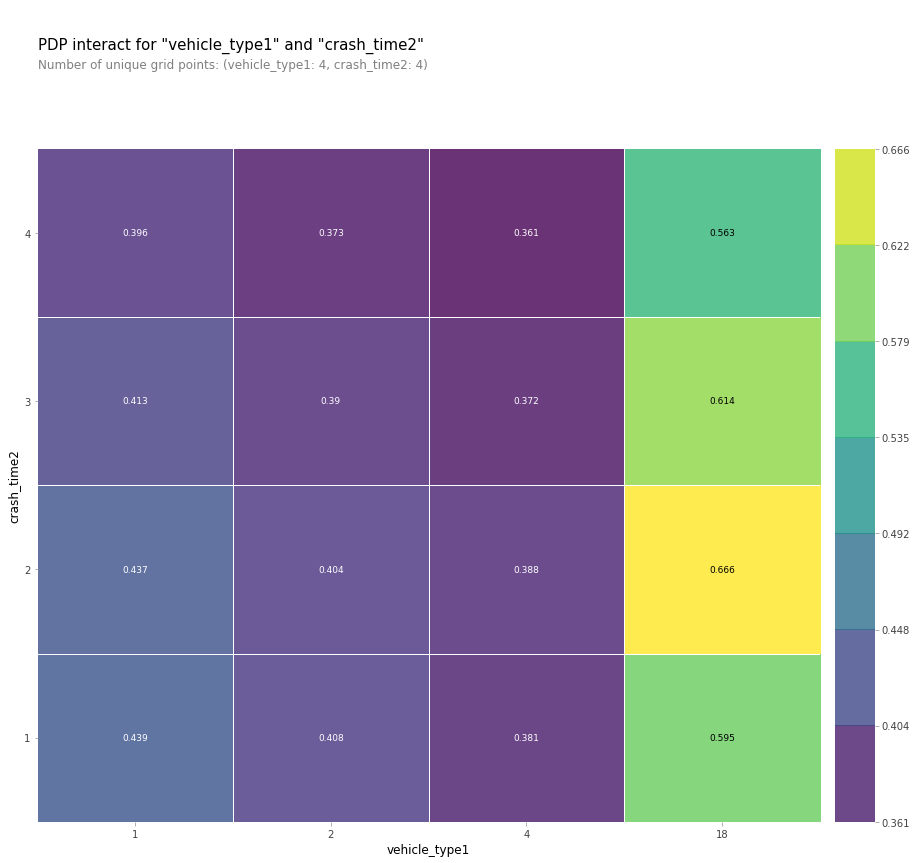

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['vehicle_type1', 'crash_time2']

interaction = pdp_interact(
    model=cb_model, 
    dataset=X_train_encoded_pd,
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features, figsize = (15,15));

**vehicle type1**과 **crash time2**는 서로 양적인 관계에 있지만, **vehicle type1**의 특정한 값에 몰려있다고 예측할 수 있습니다. </br>
타겟값에 v**ehicle_type1**의 영향이 비교적 크다고 해석할 수 있습니다.

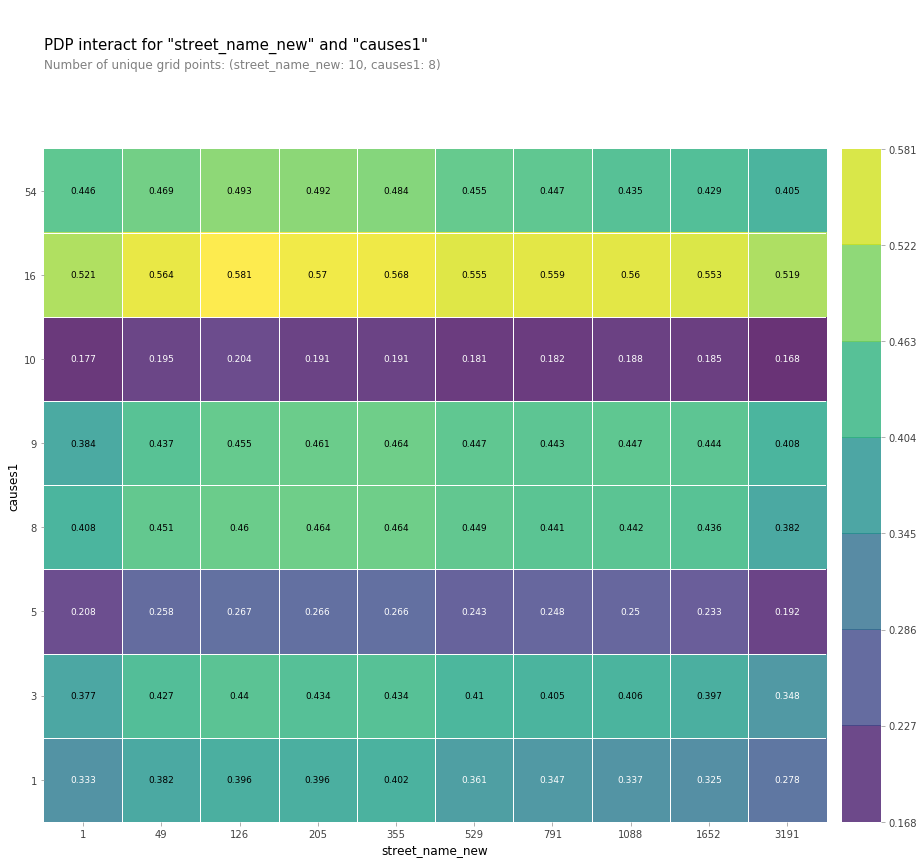

In [ ]:
features = ['street_name_new', 'causes1']

interaction = pdp_interact(
    model=cb_model, 
    dataset=X_train_encoded_pd,
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features, figsize = (15,15));

**street name new**와 **causes1**은 서로 음적/양적인 관계에 있습니다.</br>
타겟값의 변화를 보니, **causes1**의 5, 10 과 같은 특정 값들이 영향이 큰걸로 보입니다.</br></br>
특성들을 보니 대부분 특성들은 서로 연관이 없었습니다, 카테고리가 뚜렷하게 나누어져있고 값들이 몰려있다고 해석할 수 있습니다.

##### SHAP

In [255]:
row2 = X_test_encoded_pd.iloc[[9323]] # X_test의 첫번째 행 가져오기
y_test[9323], cb_model.predict(row)

(0, array([1]))

In [256]:
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row2
)

# 결과를 보니, 좌측에 있는 1을 예측하는 특성들이 보인다.

**모델이 1로 예측했는데 0인경우**</br>
실제값과 비교해보니, 0을 1로 예측하는데에 **vehicle_type2_new**, **borough**,  **crash_time2**, **street_name_new**, **causes1**등이</br> 양적인 영향을 주는걸 확인할 수 있다.</br>
즉, 양적인 영향을 주지만 모델이 틀릴만한 판단을 주는 특성들로 해석할 수 있다.

In [ ]:
row = X_test_encoded_pd.iloc[[1]]
y_test[1], cb_model.predict(row) # 실제값 / 예측값

(1, array([1]))

In [ ]:
import shap

explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)


**모델이 맞힌경우**</br>
실제값과 비교해보니, 1 (운전자 부상 O)을 잘 예측하는데에 **vehicle_type2_new**, **causes1**, **borough**,**vehicle_type1**,**days**등이</br> 양적인 영향을 주는걸 확인할 수 있다.

In [261]:
row3 = X_test_encoded_pd.iloc[[1377]] # X_test의 첫번째 행 가져오기
y_test[1377], cb_model.predict(row3)

(0, array([0]))

In [262]:
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row3
)

# 결과를 보니, 우측에 0을 예측하는 특성들이 보인다

**모델이 0으로 예측했는데 0인경우**</br>
실제값과 비교해보니, 0 (운전자 부상 X)을 잘 예측하는데에 **vehicle_type2_new**, **borough**,가 영향을 주는걸 확인 할 수 있다.

##### Permutation importance

In [263]:
import eli5
from eli5.sklearn import PermutationImportance

In [267]:
permuter = PermutationImportance(
    cb_model, # model
    scoring='f1', # metric
    random_state=2
)

permuter.fit(X_test_encoded, y_test);

#순열중요도
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

days                -0.000433
street_name_new      0.001425
crash_time2          0.002078
causes2              0.002403
borough              0.015400
vehicle_type1        0.021475
causes1              0.055149
vehicle_type2_new    0.095856
dtype: float64

In [268]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names
)

Weight,Feature
0.0959 ± 0.0067,vehicle_type2_new
0.0551 ± 0.0043,causes1
0.0215 ± 0.0012,vehicle_type1
0.0154 ± 0.0021,borough
0.0024 ± 0.0006,causes2
0.0021 ± 0.0014,crash_time2
0.0014 ± 0.0014,street_name_new
-0.0004 ± 0.0012,days


순열 중요도를 보면 모델이 사고를 접수하고 1로 판단할때 어떤 특성들이 영향을 주는지 확인할 수 있다. </br>
1. vehicle_type2_new</br>
1. causes1</br>
1. vehicle_type1</br>
1. borough</br>
1. causes2</br>
1. crash_time2</br>
1. street_name_new</br>
1. days</br></br>

In [269]:
# Catboost 최종모델 평가
cb_pred = cb_model.predict(X_test_encoded)
print(classification_report(y_test, cb_pred))
print('검증 세트 accuracy: ', cb_model.score(X_test_encoded, y_test))
print('검증 세트 recall: ',recall_score(y_test, cb_pred))
print('검증 세트 f1: ',f1_score(y_test, cb_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     27634
           1       0.40      0.75      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.61     37274
weighted avg       0.75      0.64      0.66     37274

검증 세트 accuracy:  0.6388635510006976
검증 세트 recall:  0.7481327800829876
검증 세트 f1:  0.5172673480365788


**최종모델**</br>
Accuracy: 63.9%</br>
recall: 74.9%</br>
f1_score: 51.8%</br></br>
- 최종모델이 사고가 났을때, 실제 운전자가 다쳤는지 예측할 확률: 51.8% </br>
- 모델이 유의할만큼 성능은 없어 보인다, 사고가 낫을때 반반의 확률로 맞춘다고 해석된다.</br></br>

**모델의 한계**</br>
1. 모델의 한계는 교통사고는 원인은 꼽을 수 있지만 정확한 상황들을 특정하기 어려운 주제라고 생각된다,</br> 그때그때 마다 다른 결과, 특수한 상황 등 변수의 상황들이 매우 많을 것이다. </br>
1. 성능이 개선된다고 해도, 이 모델은 교통사고를 방지하는게 아니라, 사고가 낫다면 응급처치가 필요한 상황인지</br> 아닌지 확률적으로 예측하여 사람을 더 빨리 치료할 수 있는 시간을 벌게 해주는 정도이다.
1. 사고가 난 곳의 도로가 바뀌었거나, 변수들의 조합의 내용이 달라진다면 예측이 많이 틀려질 것 같다.

**추가할 특성** : 성능을 개선시킬 추가데이터</br> 
1. lat,long을 이용하여 geolocation정보를 넣어서 결측지를 처리 및 데이터 추가 </br>
1. 날짜와 시간별로 온도,습도를 추가</br>
1. 운전자 자동차의 제작년도</br>
1. 운전자의 성별</br></br>